# **Linear Regression with Python Scikit Learn**
In this section, we implement linear regression by using the Scikit Learn library for Machine learning, and to do this we start with from simple Linear regression problem that has only two variables.

## Problem Statement
From the given data which have two variables and we have to
1. predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
2. find the predicted score if a student studies for 9.25 hrs/ day.

# Author : Saksham Kumar

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# importing student data
student_data = pd.read_csv("http://bit.ly/w-data")
student_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


* We have only two varibles Hours and Scroes.

In [3]:
# checking null values
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

* Distributioon between the Hours and Score
* Since we have main concern about the score so I choosed y-axis for this

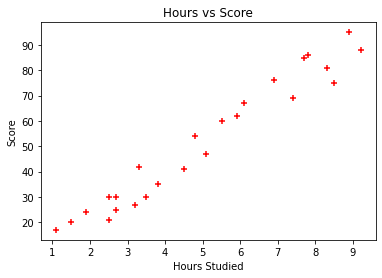

In [4]:
# Distribution of Score 
plt.scatter(student_data.Hours, student_data.Scores, marker='+', color= "red")  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

In [5]:
# coorelation
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


* Since this graph shows the score is directly proportional to the hours spended for the study.
* So we can say that more study gives better result.

## 1.2 Data preparing & Model Training
* Now dividing the student_data into input (attributes) and output (label)
* And then by using Scikit-Learn's built-in train_test_split() method we have to split this into training test and test set.

In [6]:
# Dividing the student_data into input (attributes) and output (label)
X = student_data.iloc[:, :-1].values  
Y = student_data.iloc[:, 1].values

In [7]:
# spliting the data into training test and test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [8]:
# training this model on training set
Regressor = LinearRegression()
Regressor.fit(X_train, Y_train)

LinearRegression()

#### Predicting test set result

In [9]:
Y_pred = Regressor.predict(X_test)
Y_pred

array([15.9477618 , 32.77394723, 74.344523  , 25.84551793, 59.49788879,
       38.71260091, 19.90686425, 78.30362545, 69.39564493, 11.98865934])

* These are the predicted values, so we can compare this to actual value

### Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [10]:
df = pd.DataFrame({'Actual Score %': Y_test, 'Predicted Score %': Y_pred})  
df

,Actual Score %,Predicted Score %
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


### 1.2.1 Visualizing result of training and test set
* We should visualize these two result by making scatter plot

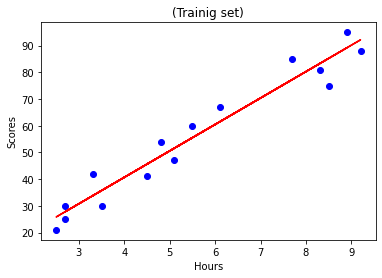

In [11]:
# PLotting the training set
plt.scatter(X_train,Y_train, color='blue')
plt.plot(X_train,Regressor.predict(X_train),color='red')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

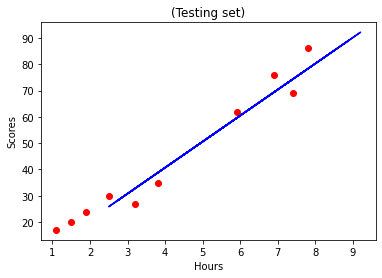

In [12]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, Regressor.predict(X_train), color = 'blue')
plt.title('(Testing set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [13]:
# Checking accuracy
print("Train : ",Regressor.score(X_train, Y_train)*100)
print("Test : ",Regressor.score(X_test, Y_test)*100)

Train :  94.40108159733136
Test :  95.66408472325591


### What will be predicted score if a student studies for 9.25 hrs/ day? 

In [14]:
Hours = np.array([[9.25]])
predict=Regressor.predict(Hours)
print("Predicted Score = {}".format(predict[0]))

Predicted Score = 92.65537184734602


* This shows that when a student studies for 9.25 hrs/day, then the predicted Score nearly 92.66%